In [ ]:
# ĐỖ LÊ PHÁT TRIỂN-19146053

In [ ]:
# Khai báo và sử dụng các thư viện sau
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from sklearn.utils import validation 
from sklearn import preprocessing

4431872/4422102 [==============================] - 0s 0us/step


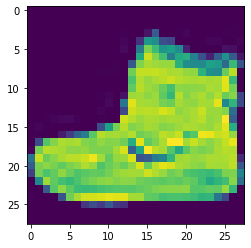

In [ ]:
# Sử dụng tập dữ liệu MNIST với bộ dữ liệu đã chia giữa phần train là 60000 và phần test là 10000
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
plt.imshow(x_train[0])
plt.show()

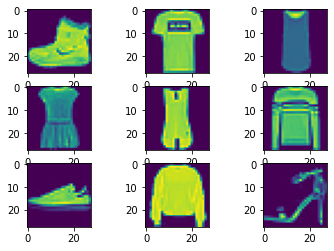

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:

y_train.shape

(60000,)

In [ ]:
# Xử lý phần dữ liệu đã chia
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
#x_train=x_train/255
#x_test=x_test/255
scaler=preprocessing.StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

In [ ]:
# Tạo mô hình
model=Sequential()
# Tạo lớp ẩn thứ nhất với 784 tín hiệu vào (784 hàng và 1 cột) và có 1024 tín hiệu ra sử dụng hàm relu
model.add(Dense(1024,activation='relu',input_shape=(784,)))
# Tạo lớp ẩn thứ hai với 1024 tín hiệu vào, 512 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 1)
model.add(Dense(512,activation='relu'))
# Tạo lớp ẩn thứ ba với 512tín hiệu vào, 512 tín hiệu ra (lấy tín hiệu vào là tín hiệu ra của lớp 2)
model.add(Dense(512,activation='relu'))
# Tạo lớp ẩn thứ tư với 512 tín hiệu vào, 10 tín hiệu ra
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              803840    
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Biên dịch 
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học 128 dữ liệu (batch_size), khi sai số không thay đổi trong 50 lần học thì sẽ dừng học ngay
history= model.fit(x_train, y_train, batch_size=128, epochs=500, verbose=1, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/500
375/375 [==============================] - 14s 37ms/step - loss: 0.2550 - accuracy: 0.9827 - val_loss: 5.7476 - val_accuracy: 0.8844
Epoch 2/500
375/375 [==============================] - 14s 36ms/step - loss: 0.1285 - accuracy: 0.9830 - val_loss: 4.3953 - val_accuracy: 0.8716
Epoch 3/500
375/375 [==============================] - 14s 36ms/step - loss: 0.1163 - accuracy: 0.9825 - val_loss: 6.7720 - val_accuracy: 0.8881
Epoch 4/500
375/375 [==============================] - 14s 36ms/step - loss: 0.2834 - accuracy: 0.9808 - val_loss: 6.1748 - val_accuracy: 0.8916
Epoch 5/500
375/375 [==============================] - 13s 36ms/step - loss: 0.1238 - accuracy: 0.9827 - val_loss: 5.2945 - val_accuracy: 0.8861
Epoch 6/500
375/375 [==============================] - 14s 36ms/step - loss: 0.1042 - accuracy: 0.9848 - val_loss: 6.0598 - val_accuracy: 0.8907
Epoch 7/500
375/375 [==============================] - 14s 36ms/step - loss: 0.1367 - accuracy: 0.9800 - val_loss: 7.5086 - val_ac

In [ ]:
# Đánh giá độ chính xác của mô hình sau khi đã train 
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 7.858924388885498
Test Accuracy 0.883899986743927


<function matplotlib.pyplot.show>

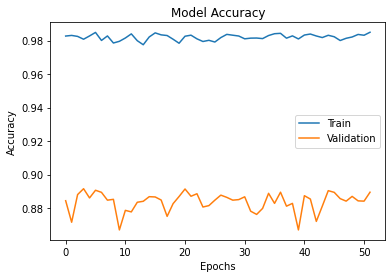

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Chuyển sang pdf
from google.colab import drive
drive.mount('/content/drive')
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('FASHION-MNIST.ipynb')

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'